# Entrenamiento con Detectron2

## Configuración Previa

In [ ]:
# Instalación de Detectron2 y sus dependencias

!python -m pip install pyyaml==5.1
import sys, os, distutils.core
!python -m pip install 'git+https://github.com/facebookresearch/detectron2.git'

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 274.2/274.2 kB 4.6 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-req-build-ambnbp78
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2.git /tmp/pip-req-build-ambnbp78
  Resolved https://github.com/facebookresearch/detectron2.git to commit 65184fc057d4fab080a98564f6b60fae0b94edc4
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.

In [ ]:
import torch, detectron2
!nvcc --version
TORCH_VERSION = ".".join(torch.__version__.split(".")[:2])
CUDA_VERSION = torch.__version__.split("+")[-1]
print("torch: ", TORCH_VERSION, "; cuda: ", CUDA_VERSION)
print("detectron2:", detectron2.__version__)

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2024 NVIDIA Corporation
Built on Thu_Jun__6_02:18:23_PDT_2024
Cuda compilation tools, release 12.5, V12.5.82
Build cuda_12.5.r12.5/compiler.34385749_0
torch:  2.6 ; cuda:  cu124
detectron2: 0.6


In [8]:
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

import numpy as np
import os, json, cv2, random
from google.colab.patches import cv2_imshow   # solo para Google Colab

from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog
from matplotlib import pyplot as plt
from detectron2.data.datasets import register_coco_instances

In [5]:
# Conectar con Google Drive. Recomendado para la ejecución en Google Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
path_dir = "/content/drive/MyDrive/TFM/MSLesSeg-Dataset/RGBkCV" # modificar la ruta a la que contiene las imágenes

## Entrenamiento Detectron2

In [ ]:
from detectron2.data.datasets import register_coco_instances
# Establecer las rutas de los conjuntos de entrenamiento y validación y sus respectivos archivos .json

# registrar de forma automatica las diferentes rutas para cada conjunto de kcrossvalidation

register_coco_instances("my_dataset_train", {}, f"{path_dir}/trainImages/trainMascaras-MSLesSeg.json", f"{path_dir}/trainImages")
register_coco_instances("my_dataset_val", {}, f"{path_dir}/valImages/valMascaras-MSLesSeg.json", f"{path_dir}/valImages")

In [ ]:
# Extracción de los metadatos para los conjuntos de entrenamiento y validación. Se utilizarán para visualizar, inferir y evaluar el modelo
train_metadata = MetadataCatalog.get("my_dataset_train")
train_dataset_dicts = DatasetCatalog.get("my_dataset_train")
val_metadata = MetadataCatalog.get("my_dataset_val")
val_dataset_dicts = DatasetCatalog.get("my_dataset_val")

[05/07 16:53:02 d2.data.datasets.coco]: Loading /content/drive/MyDrive/TFM/MSLesSeg-Dataset/trainImages/trainMascaras-MSLesSeg.json takes 42.49 seconds.
[05/07 16:53:02 d2.data.datasets.coco]: Loaded 13286 images in COCO format from /content/drive/MyDrive/TFM/MSLesSeg-Dataset/trainImages/trainMascaras-MSLesSeg.json
[05/07 16:53:03 d2.data.datasets.coco]: Loaded 3458 images in COCO format from /content/drive/MyDrive/TFM/MSLesSeg-Dataset/valImages/valMascaras-MSLesSeg.json


In [10]:
register_coco_instances("my_dataset_train1CV", {}, f"{path_dir}/1CrossVal/trainImages/trainMascaras-MSLesSeg.json", f"{path_dir}/1CrossVal/trainImages")
register_coco_instances("my_dataset_val1CV", {}, f"{path_dir}/1CrossVal/valImages/valMascaras-MSLesSeg.json", f"{path_dir}/1CrossVal/valImages")

train_metadata1CV = MetadataCatalog.get("my_dataset_train1CV")
train_dataset_dicts1CV = DatasetCatalog.get("my_dataset_train1CV")
val_metadata1CV = MetadataCatalog.get("my_dataset_val1CV")
val_dataset_dicts1CV = DatasetCatalog.get("my_dataset_val1CV")

[05/29 18:50:35 d2.data.datasets.coco]: Loaded 13286 images in COCO format from /content/drive/MyDrive/TFM/MSLesSeg-Dataset/RGBkCV/1CrossVal/trainImages/trainMascaras-MSLesSeg.json
[05/29 18:50:35 d2.data.datasets.coco]: Loaded 3458 images in COCO format from /content/drive/MyDrive/TFM/MSLesSeg-Dataset/RGBkCV/1CrossVal/valImages/valMascaras-MSLesSeg.json


In [12]:
register_coco_instances("my_dataset_train2CV", {}, f"{path_dir}/2CrossVal/trainImages/trainMascaras-MSLesSeg.json", f"{path_dir}/2CrossVal/trainImages")
register_coco_instances("my_dataset_val2CV", {}, f"{path_dir}/2CrossVal/valImages/valMascaras-MSLesSeg.json", f"{path_dir}/2CrossVal/valImages")

train_metadata2CV = MetadataCatalog.get("my_dataset_train2CV")
train_dataset_dicts2CV = DatasetCatalog.get("my_dataset_train2CV")
val_metadata2CV = MetadataCatalog.get("my_dataset_val2CV")
val_dataset_dicts2CV = DatasetCatalog.get("my_dataset_val2CV")

[05/29 18:51:39 d2.data.datasets.coco]: Loading /content/drive/MyDrive/TFM/MSLesSeg-Dataset/RGBkCV/2CrossVal/trainImages/trainMascaras-MSLesSeg.json takes 44.62 seconds.
[05/29 18:51:39 d2.data.datasets.coco]: Loaded 13286 images in COCO format from /content/drive/MyDrive/TFM/MSLesSeg-Dataset/RGBkCV/2CrossVal/trainImages/trainMascaras-MSLesSeg.json
[05/29 18:51:52 d2.data.datasets.coco]: Loading /content/drive/MyDrive/TFM/MSLesSeg-Dataset/RGBkCV/2CrossVal/valImages/valMascaras-MSLesSeg.json takes 12.82 seconds.
[05/29 18:51:52 d2.data.datasets.coco]: Loaded 3458 images in COCO format from /content/drive/MyDrive/TFM/MSLesSeg-Dataset/RGBkCV/2CrossVal/valImages/valMascaras-MSLesSeg.json


## Training

In [23]:
from detectron2.engine import DefaultTrainer

cfg = get_cfg()
cfg.OUTPUT_DIR = f"{path_dir}/Detectron2_models/RGBkCV/2000epochs"
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.DATASETS.TRAIN = ("my_dataset_train2CV",)
cfg.DATASETS.TEST = ()
cfg.DATALOADER.NUM_WORKERS = 2
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")  # Descarga del modelo troncal Mask R-CNN con ResNet50 y FPN
cfg.SOLVER.IMS_PER_BATCH = 2  # El batch es pequeño dada la dimensión de nuestro conjunto de datos
cfg.SOLVER.BASE_LR = 0.00025
cfg.SOLVER.MAX_ITER = 2000    # 6000 iteraciones han sido las óptimas para el proyecto
cfg.SOLVER.STEPS = []
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 256
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 1  # Tenemos tan solo la clase Lesion, no se tiene en cuenta el fondo de la imagen

In [24]:
os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = DefaultTrainer(cfg) # Se crea un objeto Trainer con la configuración
trainer.resume_or_load(resume=True) # cambiar a True para utilizar el último checkpoint y reanudar el entrenamiento

[05/29 19:23:49 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

In [25]:
trainer.train()

[05/29 19:23:54 d2.engine.train_loop]: Starting training from iteration 1000
[05/29 19:24:08 d2.utils.events]:  eta: 0:09:56  iter: 1019  total_loss: 0.9496  loss_cls: 0.164  loss_box_reg: 0.2968  loss_mask: 0.3701  loss_rpn_cls: 0.02227  loss_rpn_loc: 0.03023    time: 0.6453  last_time: 0.8767  data_time: 0.1658  last_data_time: 0.0077   lr: 0.00025  max_mem: 2203M
[05/29 19:24:19 d2.utils.events]:  eta: 0:09:19  iter: 1039  total_loss: 0.9125  loss_cls: 0.1844  loss_box_reg: 0.3412  loss_mask: 0.3657  loss_rpn_cls: 0.02861  loss_rpn_loc: 0.02676    time: 0.6105  last_time: 0.6739  data_time: 0.0548  last_data_time: 0.1582   lr: 0.00025  max_mem: 2203M
[05/29 19:24:30 d2.utils.events]:  eta: 0:08:37  iter: 1059  total_loss: 0.8576  loss_cls: 0.1488  loss_box_reg: 0.2569  loss_mask: 0.3496  loss_rpn_cls: 0.02447  loss_rpn_loc: 0.0246    time: 0.5893  last_time: 0.6485  data_time: 0.1449  last_data_time: 0.2357   lr: 0.00025  max_mem: 2206M
[05/29 19:24:42 d2.utils.events]:  eta: 0:08:2

In [26]:
import yaml
# Guardamos la configuración en un archivo .yaml
config_yaml_path = f"{path_dir}/Detectron2_models/RGBkCV/2000epochs/config.yaml"
with open(config_yaml_path, 'w') as file:
    yaml.dump(cfg, file)

## Inferencia

In [27]:
# Cargamos el modelo que hemos entrenado con el directorio de salida
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5   # ponemos un umbral para el test, puede modificarse
predictor = DefaultPredictor(cfg)

[05/29 19:33:07 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from /content/drive/MyDrive/TFM/MSLesSeg-Dataset/RGBkCV/Detectron2_models/RGBkCV/2000epochs/model_final.pth ...


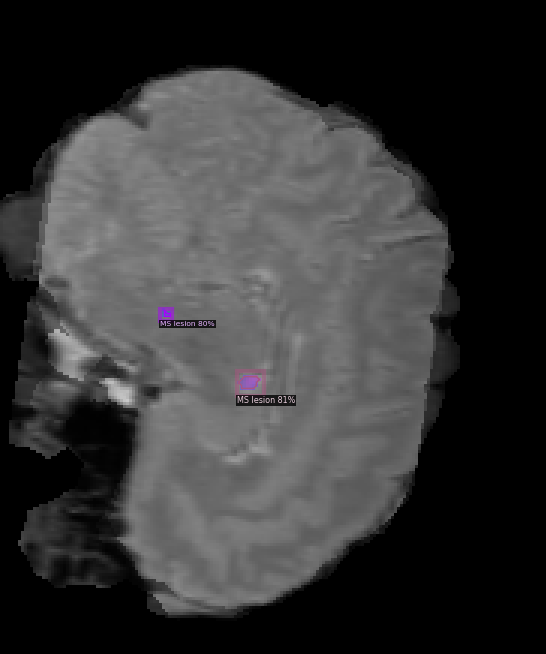

In [ ]:
from detectron2.utils.visualizer import ColorMode

for d in random.sample(val_dataset_dicts, 1):    # del conjunto de validación se realiza una prueba de inferencia
    im = cv2.imread(d["file_name"])
    print(d["file_name"])  #printear el nombre de la imagen, guardarlo y mostrar al lado la máscara correspondiente haciendo un merge quizás sobre la imagen original (?)
    outputs = predictor(im)
    v = Visualizer(im[:, :, ::-1],
                   metadata=val_metadata,
                   scale=3,
                   instance_mode=ColorMode.IMAGE_BW   # se pone en blanco y negro aquellos pixeles que no estén dentro de zonas segmentadas
    )
    out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    cv2_imshow(out.get_image()[:, :, ::-1])

Imagen de validación: /content/drive/MyDrive/TFM/MSLesSeg-Dataset/valImages/P18_T1_slice_57.png


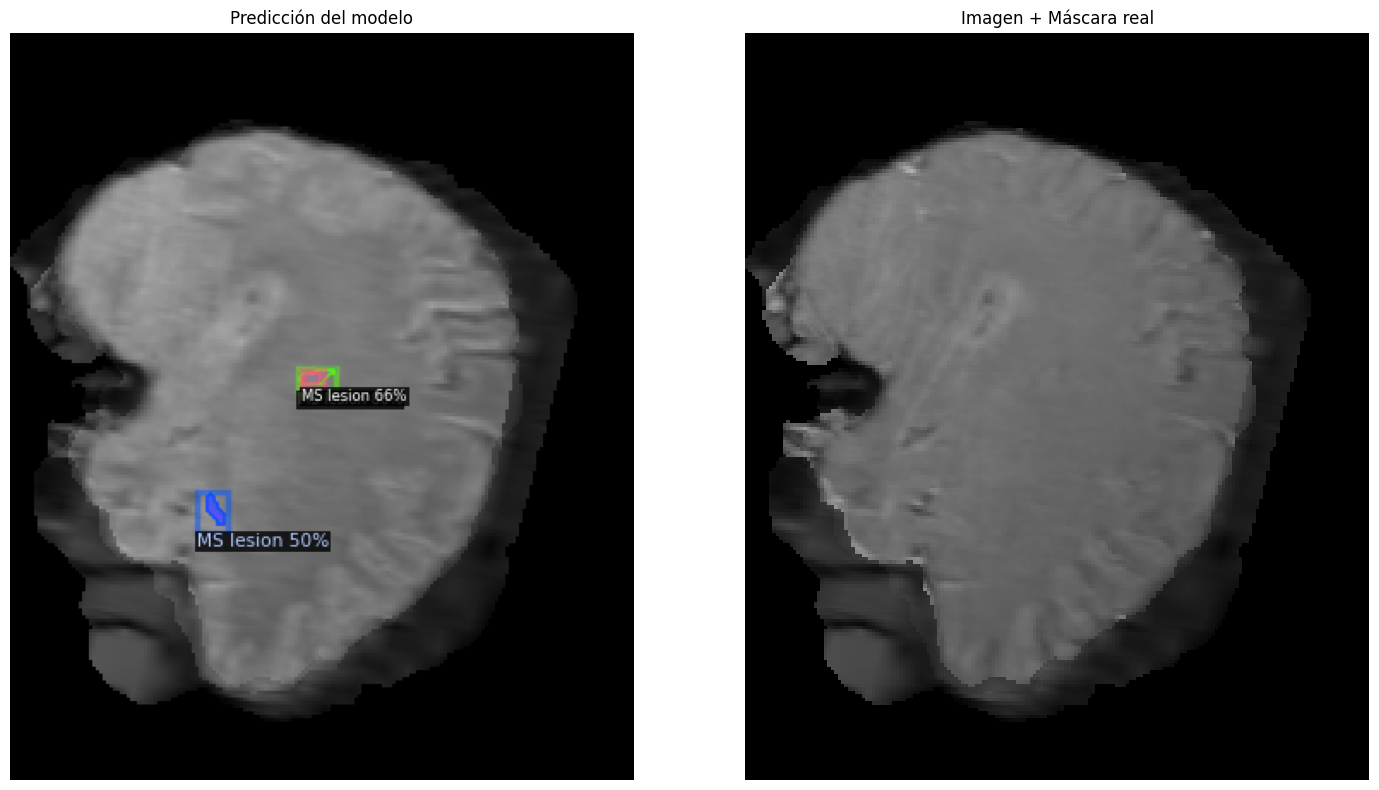

In [ ]:
import cv2
import os
import random
import numpy as np
from detectron2.utils.visualizer import Visualizer, ColorMode
from matplotlib import pyplot as plt

val_mask_dir = "/content/drive/MyDrive/TFM/MSLesSeg-Dataset/valMasks"

for d in random.sample(val_dataset_dicts, 1):  # prueba con una imagen
    file_name = d["file_name"]
    im = cv2.imread(file_name)

    print("Imagen de validación:", file_name)

    # Inferencia con el modelo
    outputs = predictor(im)
    v = Visualizer(im[:, :, ::-1],
                   metadata=val_metadata,
                   scale=2,
                   instance_mode=ColorMode.IMAGE_BW)
    out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    pred_img = out.get_image()[:, :, ::-1]

    # Cargar máscara real
    image_filename = os.path.basename(file_name)
    mask_path = os.path.join(val_mask_dir, image_filename)
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

    if mask is None:
        print(f"No se encontró la máscara para {image_filename}")
        continue

    # Convertir la imagen a blanco y negro (escala de grises)
    im_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
    im_gray_3ch = cv2.cvtColor(im_gray, cv2.COLOR_GRAY2BGR)

    # Crear superposición en rojo (color de lesión) sobre la imagen en escala de grises
    mask_colored = np.zeros_like(im_gray_3ch)
    mask_colored[:, :, 2] = 255  # rojo puro

    alpha = 0.4
    overlay = np.where(mask[..., None] == 255,
                       (alpha * mask_colored + (1 - alpha) * im_gray_3ch).astype(np.uint8),
                       im_gray_3ch)

    # Mostrar lado a lado: predicción y GT
    fig, axs = plt.subplots(1, 2, figsize=(15, 8))
    axs[0].imshow(cv2.cvtColor(pred_img, cv2.COLOR_BGR2RGB))
    axs[0].set_title("Predicción del modelo")
    axs[0].axis("off")

    axs[1].imshow(cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB))
    axs[1].set_title("Imagen + Máscara real")
    axs[1].axis("off")

    plt.tight_layout()
    plt.show()


In [28]:
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader

# evaluamos las métricas del modelo con COCOEvaluator
evaluator = COCOEvaluator("my_dataset_val2CV", output_dir=f"{path_dir}/Detectron2_models/RGBkCV/evaluacion/2000epochs")
val_loader = build_detection_test_loader(cfg, "my_dataset_val2CV")
print(inference_on_dataset(predictor.model, val_loader, evaluator))

[05/29 19:33:24 d2.data.datasets.coco]: Loaded 3458 images in COCO format from /content/drive/MyDrive/TFM/MSLesSeg-Dataset/RGBkCV/2CrossVal/valImages/valMascaras-MSLesSeg.json
[05/29 19:33:24 d2.data.build]: Distribution of instances among all 1 categories:
|  category  | #instances   |
|:----------:|:-------------|
| MS lesion  | 2373         |
|            |              |
[05/29 19:33:24 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[05/29 19:33:24 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[05/29 19:33:24 d2.data.common]: Serializing 3458 elements to byte tensors and concatenating them all ...
[05/29 19:33:24 d2.data.common]: Serialized dataset takes 0.88 MiB
[05/29 19:33:24 d2.evaluation.evaluator]: Start inference on 3458 batches
[05/29 19:33:27 d2.evaluation.evaluator]: Inference done 11/3458. Dataloading:

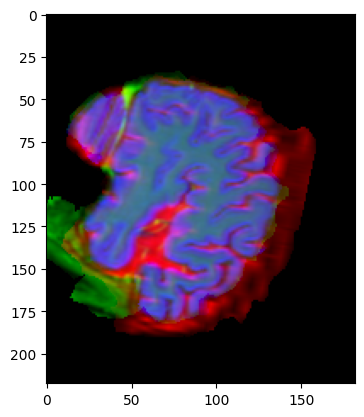

In [ ]:
# Cargamos una imagen del conjunto de test y la pasamos al predictor
new_im = cv2.imread(f"{path_dir}/testImages/P75_slice_137.png")
outputs = predictor(new_im)

# Con el objeto Visualizer nos permite mostrar por pantalla y guardar los resultados de segmentación
v = Visualizer(new_im[:, :, ::-1], metadata=train_metadata)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
plt.imshow(out.get_image())
plt.imsave(f"{path_dir}/predictImages/P75_slice_137Detectron2-2000e.jpg", out.get_image())